In [133]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [144]:
df1 = pd.read_csv("house_newyork_price.csv")
df1.head()

,Price,"Living,Area",Bathrooms,Bedrooms,Fireplaces,"Lot,Size",Age,Fireplace
0,142212,1982,1.0,3,0,2.00,133,False
1,134865,1676,1.5,3,1,0.38,14,True
2,118007,1694,2.0,3,1,0.96,15,True
3,138297,1800,1.0,2,2,0.48,49,True
4,129470,2088,1.0,3,1,1.84,29,True


In [145]:
df1.shape

(1057, 8)

In [146]:
df1.columns

Index(['Price', 'Living,Area', 'Bathrooms', 'Bedrooms', 'Fireplaces',
       'Lot,Size', 'Age', 'Fireplace'],
      dtype='object')

In [149]:
df1['Bedrooms'].unique()

array([3, 2, 4, 5, 1], dtype=int64)

In [150]:
#df1['area_type'].value_counts()
df1.head(3)

,Price,"Living,Area",Bathrooms,Bedrooms,Fireplaces,"Lot,Size",Age,Fireplace
0,142212,1982,1.0,3,0,2.00,133,False
1,134865,1676,1.5,3,1,0.38,14,True
2,118007,1694,2.0,3,1,0.96,15,True


In [171]:
df1 = df1.rename(columns={"Living,Area": "LivingAreas", "Lot,Size": "LotSize"})

**Drop features that are not required to build the model**


In [172]:
df2 = df1.drop(['Fireplace'],axis='columns')
df2.shape

(1057, 7)

In [173]:
df2.shape

(1057, 7)

**Data cleaning: handle NA values**

In [174]:
df2.isnull().sum()

Price          0
LivingAreas    0
Bathrooms      0
Bedrooms       0
Fireplaces     0
LotSize        9
Age            0
dtype: int64

In [175]:
df3 = df2.dropna()
df3.isnull().sum()

Price          0
LivingAreas    0
Bathrooms      0
Bedrooms       0
Fireplaces     0
LotSize        0
Age            0
dtype: int64

In [176]:
df3.shape
df3.head(5)

,Price,LivingAreas,Bathrooms,Bedrooms,Fireplaces,LotSize,Age
0,142212,1982,1.0,3,0,2.00,133
1,134865,1676,1.5,3,1,0.38,14
2,118007,1694,2.0,3,1,0.96,15
3,138297,1800,1.0,2,2,0.48,49
4,129470,2088,1.0,3,1,1.84,29


**Feature engineering**
** Add new feature (integer) for bhk**

In [24]:
#create a new column to make total BHK column extracting values from size
# df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
# df3.bhk.unique()

C:\Users\syadav\AppData\Local\Temp\ipykernel_32708\2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [28]:
# df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [177]:
df3.head()


,Price,LivingAreas,Bathrooms,Bedrooms,Fireplaces,LotSize,Age
0,142212,1982,1.0,3,0,2.00,133
1,134865,1676,1.5,3,1,0.38,14
2,118007,1694,2.0,3,1,0.96,15
3,138297,1800,1.0,2,2,0.48,49
4,129470,2088,1.0,3,1,1.84,29


In [178]:
df3['Bathrooms'].unique()

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [179]:
# applying filter to check house 
df3[df3.Bathrooms>=4]

,Price,LivingAreas,Bathrooms,Bedrooms,Fireplaces,LotSize,Age
211,562546,5228,4.0,4,4,0.45,14
254,379678,3720,4.0,5,1,0.80,0
708,337918,3026,4.0,4,1,1.34,1
747,599701,5114,4.5,5,2,0.34,131
877,354739,3982,4.5,4,1,5.61,6
938,379472,3440,4.0,5,1,0.77,1
964,347761,3820,4.5,4,1,1.40,18


In [181]:
df3.LivingAreas.unique()

array([1982, 1676, 1694, 1800, 2088, 1456, 1464, 1216, 1632, 2270, 1804,
       1600, 1460, 1548, 1590, 1170, 1510, 2299, 2577, 2328, 1172, 1554,
       1242, 1376, 1107, 2250, 2472, 2843, 1400, 1342,  813, 1480, 1392,
       1512, 1696, 1595, 2291, 1391, 2501, 1662,  957, 2275, 1440, 1008,
       2116, 1100,  960, 1228, 1560, 2164, 2634, 1000,  912, 1572, 1700,
       1350, 1416, 1326, 1989, 1158, 1272, 1852, 2308, 1628, 2738, 1292,
       1056, 1328, 1944, 1232, 1164, 1215, 1486, 1064, 1547, 1148, 1821,
        995, 1176, 1500, 1214, 1380, 1324, 1218, 1629, 1053, 1308, 1344,
       1608, 3285, 1582, 1642, 1248, 1411, 1593, 1666, 1471, 1876, 1747,
       2527, 3015,  967, 1720, 3515, 2815,  720, 3001, 1822, 1343, 1144,
       1888, 1668, 3853, 2278, 1360, 3504, 1921, 3726, 2079, 1184,  908,
       1492, 2011, 2195, 1561, 2656, 2425, 1334, 1680, 1514, 1656, 2648,
       1092, 1880, 1592, 2516, 2310, 3076, 3355, 1886, 1605, 1772, 2044,
       1124, 3192, 1498,  896,  986, 2087, 1596, 17

**Explore total_sqft feature**

In [182]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [183]:
df3[~df3['LivingAreas'].apply(is_float)].head(10)

,Price,LivingAreas,Bathrooms,Bedrooms,Fireplaces,LotSize,Age


Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [184]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [42]:
#convert_sqft_to_num('2100 - 2850')

2475.0

In [187]:
# create new dataframe and apply function 'convert_sqft_to_num'
df4 = df3.copy()
df4.LivingAreas = df4.LivingAreas.apply(convert_sqft_to_num)
df4 = df4[df4.LivingAreas.notnull()]
df4.head(2)

AttributeError: 'int' object has no attribute 'split'

In [188]:
df4.head()

,Price,LivingAreas,Bathrooms,Bedrooms,Fireplaces,LotSize,Age
0,142212,1982,1.0,3,0,2.00,133
1,134865,1676,1.5,3,1,0.38,14
2,118007,1694,2.0,3,1,0.96,15
3,138297,1800,1.0,2,2,0.48,49
4,129470,2088,1.0,3,1,1.84,29


In [189]:
df4.loc[30]

Price          109578.00
LivingAreas      1342.00
Bathrooms           1.00
Bedrooms            2.00
Fireplaces          1.00
LotSize             0.57
Age                41.00
Name: 30, dtype: float64

**Add new feature called price per square feet**

In [190]:
df5 = df4.copy()
df5['price_per_sqft_LivingAreas'] = round(df5['Price']/df5['LivingAreas'],0)
df5.head()

,Price,LivingAreas,Bathrooms,Bedrooms,Fireplaces,LotSize,Age,price_per_sqft_LivingAreas
0,142212,1982,1.0,3,0,2.00,133,72.0
1,134865,1676,1.5,3,1,0.38,14,80.0
2,118007,1694,2.0,3,1,0.96,15,70.0
3,138297,1800,1.0,2,2,0.48,49,77.0
4,129470,2088,1.0,3,1,1.84,29,62.0


In [191]:
df5_stats = df5['price_per_sqft_LivingAreas'].describe()
df5_stats

count    1048.000000
mean       93.288168
std        31.773298
min        10.000000
25%        79.000000
50%        90.000000
75%       103.000000
max       608.000000
Name: price_per_sqft_LivingAreas, dtype: float64

In [53]:
#len(df5.location.unique())


1298

In [57]:
# df5.location = df5.location.apply(lambda x: x.strip())
# location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
# #location_stats = df5['location'].value_counts(ascending=False)
# location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [58]:
#len(location_stats[location_stats<=10])

1047

In [59]:
# location_stats_less_than_10 = location_stats[location_stats<=10]
# location_stats_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [60]:
#len(df5.location.unique())

1287

In [62]:
# df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
# len(df5.location.unique())

241

In [192]:
df5.head(10)

,Price,LivingAreas,Bathrooms,Bedrooms,Fireplaces,LotSize,Age,price_per_sqft_LivingAreas
0,142212,1982,1.0,3,0,2.00,133,72.0
1,134865,1676,1.5,3,1,0.38,14,80.0
2,118007,1694,2.0,3,1,0.96,15,70.0
3,138297,1800,1.0,2,2,0.48,49,77.0
4,129470,2088,1.0,3,1,1.84,29,62.0
5,206512,1456,2.0,3,0,0.98,10,142.0
7,108794,1464,1.0,2,0,0.11,87,74.0
8,68353,1216,1.0,2,0,0.61,101,56.0
9,123266,1632,1.5,3,0,0.23,14,76.0
10,309808,2270,2.5,3,2,4.05,9,136.0


In [193]:
#df5.to_csv("bhp.csv",index=False)
df5.head(5)

,Price,LivingAreas,Bathrooms,Bedrooms,Fireplaces,LotSize,Age,price_per_sqft_LivingAreas
0,142212,1982,1.0,3,0,2.00,133,72.0
1,134865,1676,1.5,3,1,0.38,14,80.0
2,118007,1694,2.0,3,1,0.96,15,70.0
3,138297,1800,1.0,2,2,0.48,49,77.0
4,129470,2088,1.0,3,1,1.84,29,62.0


Text(0, 0.5, 'Count')

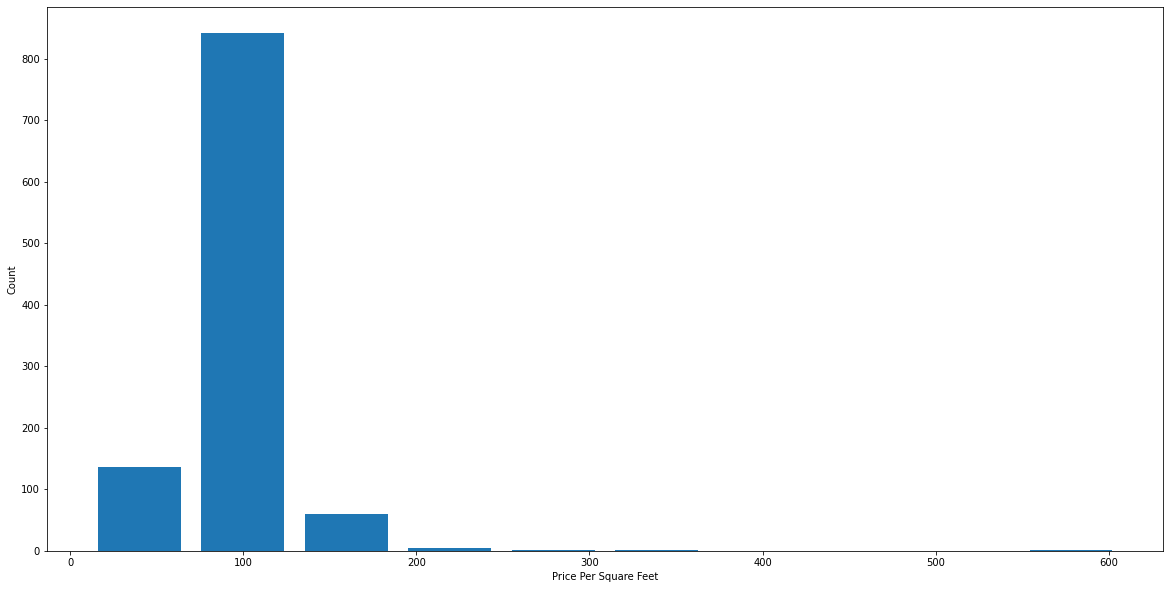

In [211]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df5.price_per_sqft_LivingAreas,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

**Outlier removal using business logic**


As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [199]:
df5[df5.price_per_sqft_LivingAreas<40].head()
#len(df5[df5.price_per_sqft_LivingAreas<40].head())

,Price,LivingAreas,Bathrooms,Bedrooms,Fireplaces,LotSize,Age,price_per_sqft_LivingAreas
55,79893,2634,2.5,4,0,0.24,83,30.0
75,45904,1328,1.0,4,0,0.19,103,35.0
93,44674,1214,1.0,3,0,0.14,103,37.0
97,16858,1629,1.0,3,0,0.76,180,10.0
102,59003,3285,2.0,5,0,0.42,233,18.0


In [196]:
df5.shape

(1048, 8)

In [200]:
df6 = df5[~(df5.price_per_sqft_LivingAreas<40)]
df6.shape

(1028, 8)

**Outlier Removal Using Standard Deviation and Mean**

In [201]:
df6.price_per_sqft_LivingAreas.describe()

count    1028.000000
mean       94.517510
std        30.800749
min        40.000000
25%        80.000000
50%        90.500000
75%       104.000000
max       608.000000
Name: price_per_sqft_LivingAreas, dtype: float64

In [71]:
# def remove_pps_outliers(df):
#     df_out = pd.DataFrame()
#     for key, subdf in df.groupby('location'):
#         m = np.mean(subdf.price_per_sqft)
#         st = np.std(subdf.price_per_sqft)
#         reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
#         df_out = pd.concat([df_out,reduced_df],ignore_index=True)
#     return df_out
# df7 = remove_pps_outliers(df6)
# df7.shape

(10242, 7)

In [204]:
df7 = df6.copy()

In [206]:
df7.head(5)

,Price,LivingAreas,Bathrooms,Bedrooms,Fireplaces,LotSize,Age,price_per_sqft_LivingAreas
0,142212,1982,1.0,3,0,2.00,133,72.0
1,134865,1676,1.5,3,1,0.38,14,80.0
2,118007,1694,2.0,3,1,0.96,15,70.0
3,138297,1800,1.0,2,2,0.48,49,77.0
4,129470,2088,1.0,3,1,1.84,29,62.0


**Let's check if for a property with fireplace how does the 2 Bedrooms and 3 Bedrooms property prices look like**

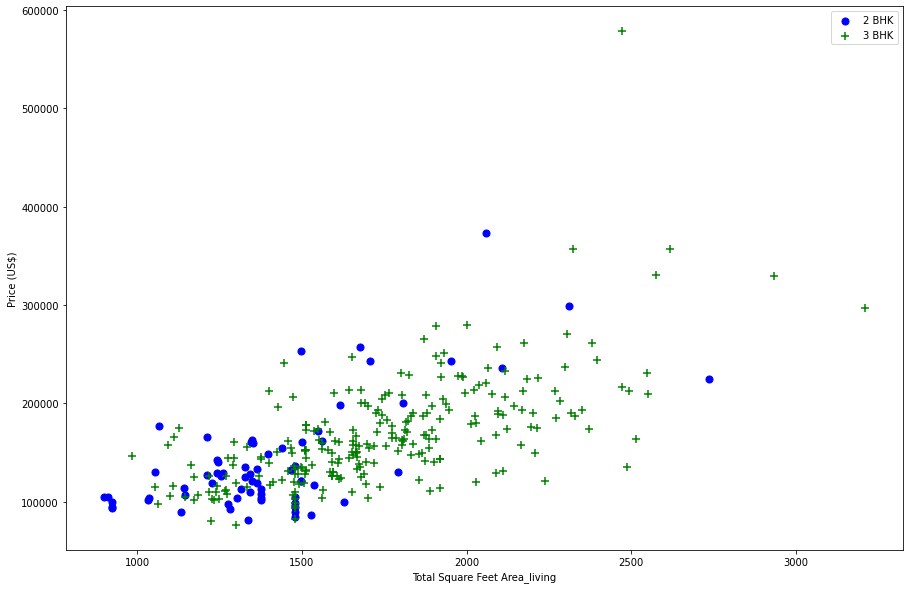

In [208]:
def plot_scatter_chart(df,Fireplaces):
    bhk2 = df[(df.Fireplaces==Fireplaces) & (df.Bedrooms==2)]
    bhk3 = df[(df.Fireplaces==Fireplaces) & (df.Bedrooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.LivingAreas,bhk2.Price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.LivingAreas,bhk3.Price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area_living")
    plt.ylabel("Price (US$)")
    #plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,1) # 1 for presence of fireplace, 0 for absence

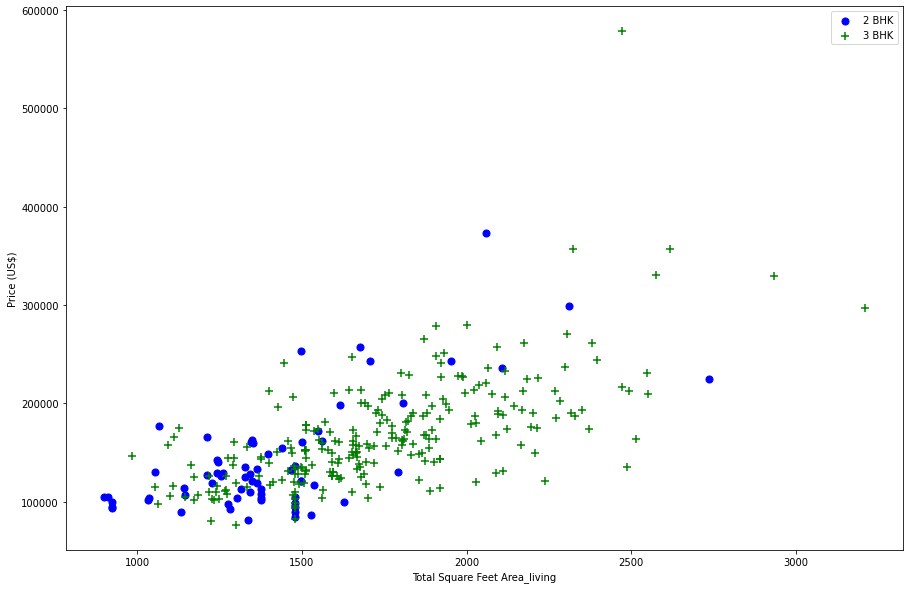

In [209]:
plot_scatter_chart(df7,1)

**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [75]:
# def remove_bhk_outliers(df):
#     exclude_indices = np.array([])
#     for location, location_df in df.groupby('location'):
#         bhk_stats = {}
#         for bhk, bhk_df in location_df.groupby('bhk'):
#             bhk_stats[bhk] = {
#                 'mean': np.mean(bhk_df.price_per_sqft),
#                 'std': np.std(bhk_df.price_per_sqft),
#                 'count': bhk_df.shape[0]
#             }
#         for bhk, bhk_df in location_df.groupby('bhk'):
#             stats = bhk_stats.get(bhk-1)
#             if stats and stats['count']>5:
#                 exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
#     return df.drop(exclude_indices,axis='index')
# df8 = remove_bhk_outliers(df7)
# # df8 = df7.copy()
# df8.shape

(7319, 7)

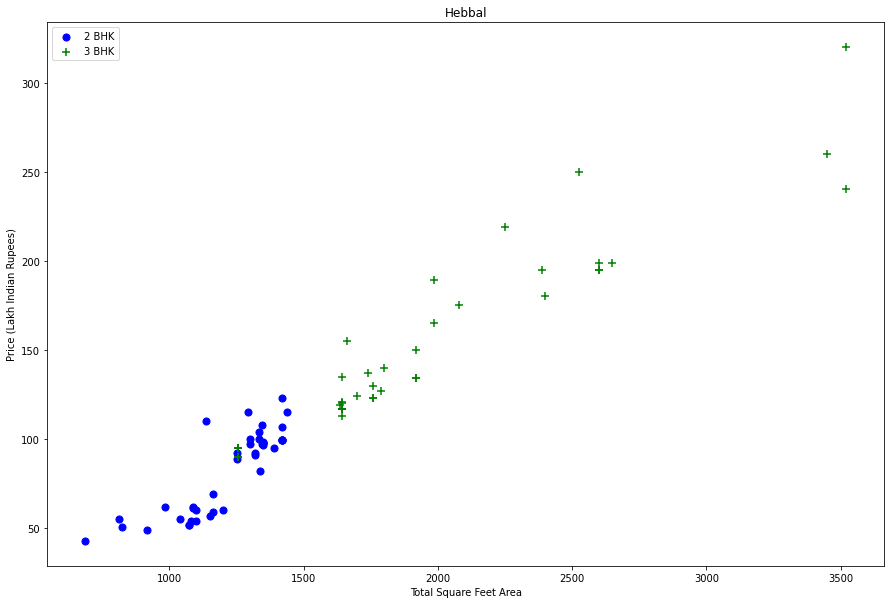

In [78]:
# plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

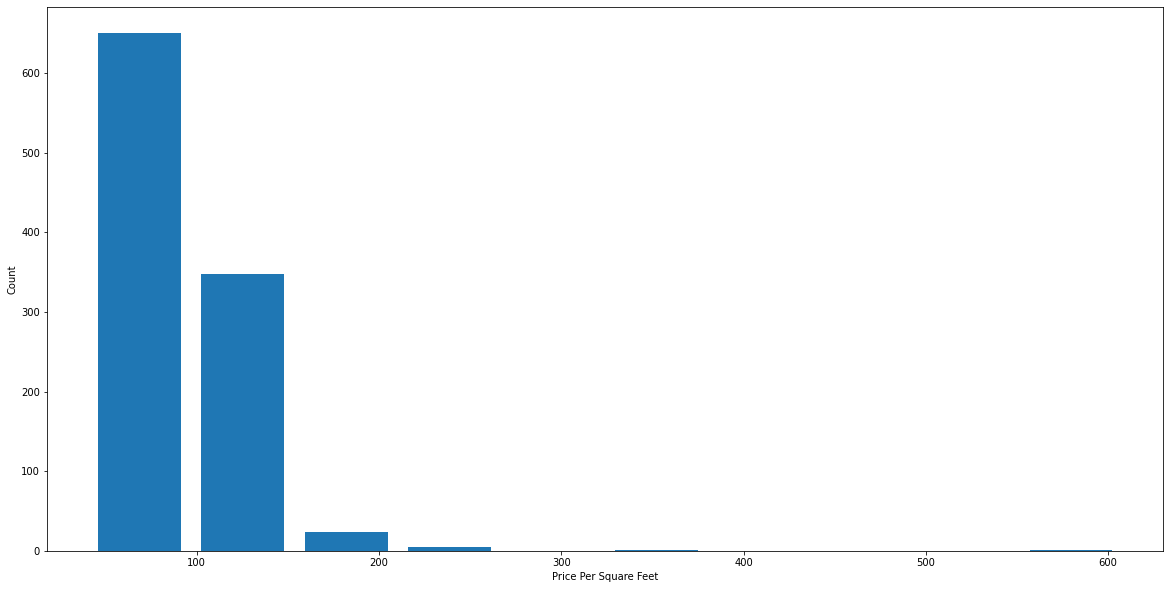

In [210]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft_LivingAreas,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [213]:
df7.head()

,Price,LivingAreas,Bathrooms,Bedrooms,Fireplaces,LotSize,Age,price_per_sqft_LivingAreas
0,142212,1982,1.0,3,0,2.00,133,72.0
1,134865,1676,1.5,3,1,0.38,14,80.0
2,118007,1694,2.0,3,1,0.96,15,70.0
3,138297,1800,1.0,2,2,0.48,49,77.0
4,129470,2088,1.0,3,1,1.84,29,62.0


In [214]:
df7.Bathrooms.unique()

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [81]:
#df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.0
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.0
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.0
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.0
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.0


**Outlier Removal using Bathrooms Feature**

Text(0, 0.5, 'Count')

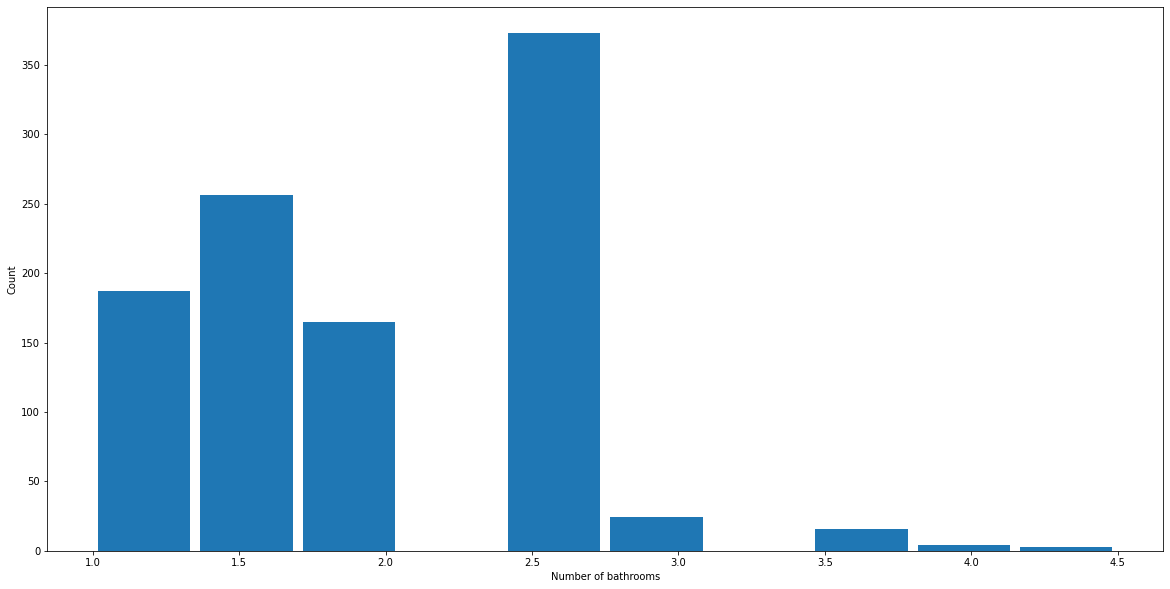

In [218]:
plt.hist(df7.Bathrooms,rwidth=0.9)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [88]:
#len(df8[df8.bath>10])

5

In [89]:
#it is unusual to have 2 more bathrooms than number of bedrooms in a home
#df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.0
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6429.0
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.0
8408,other,6 BHK,11338.0,9.0,1000.0,6,8820.0


In [90]:
#len(df8[df8.bath>df8.bhk+2])

4

Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed


In [91]:
#df9 = df8[df8.bath<df8.bhk+2]
#df9.shape

(7241, 7)

In [95]:
#df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15018.0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11902.0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.0
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11984.0


In [96]:
#df10 = df9.drop(['size','price_per_sqft'],axis='columns')
#df10.head(2)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3


**Use One Hot Encoding for Location**

**changing the categories information to an encoded values for applying machine learning**

In [99]:
#dummies = pd.get_dummies(df10.location)
#dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
#df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
#df11.head(5)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
#df12 = df11.drop('location',axis='columns')
#df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Build a Machine Learning Model Now**

In [219]:
#df12.shape
df7.shape

(1028, 8)

In [220]:
df7.head(3)

,Price,LivingAreas,Bathrooms,Bedrooms,Fireplaces,LotSize,Age,price_per_sqft_LivingAreas
0,142212,1982,1.0,3,0,2.00,133,72.0
1,134865,1676,1.5,3,1,0.38,14,80.0
2,118007,1694,2.0,3,1,0.96,15,70.0


In [266]:
#creating independent variable
#X = df7.drop(['Price','Bathrooms','LotSize','Fireplaces','Age','price_per_sqft_LivingAreas'],axis='columns')
X = df7.drop(['Price','LotSize','Fireplaces','Age','price_per_sqft_LivingAreas'],axis='columns')
X.head(3)

,LivingAreas,Bathrooms,Bedrooms
0,1982,1.0,3
1,1676,1.5,3
2,1694,2.0,3


In [258]:
#Assigning dependent variable which is price
y = df7.Price
y.head(3)

0    142212
1    134865
2    118007
Name: Price, dtype: int64

In [236]:
#len(X)
len(y)

1028

In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [244]:
X_train.shape

(822, 1)

In [268]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.601043456432663

**Use K fold cross validation to measure accuracy of LinearRegression model**

In [283]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.73352283, 0.60192364, 0.67282961, 0.53562955, 0.62361484])

**Find best model using GridSearchCV**

In [254]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [255]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\syadav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\syadav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be remove

,model,best_score,best_params
0,linear_regression,0.622357,{'normalize': True}
1,lasso,0.622359,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.392564,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


**Test the model for few properties**

In [256]:
X.columns

Index(['LivingAreas', 'Bedrooms'], dtype='object')

In [121]:
# def predict_price(location,sqft,bath,bhk):    
#     loc_index = np.where(X.columns==location)[0][0]

#     x = np.zeros(len(X.columns))
#     x[0] = sqft
#     x[1] = bath
#     x[2] = bhk
#     if loc_index >= 0:
#         x[loc_index] = 1

#     return lr_clf.predict([x])[0]

In [130]:
#predict_price('1st Phase JP Nagar',1000, 2, 3)

C:\Users\syadav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.9677042825915

In [128]:
#predict_price('Indira Nagar',1000,3,2)

C:\Users\syadav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


183.44542824143878

**Export the tested model to a pickle file**

In [131]:
# import pickle
# with open('banglore_home_prices_model.pickle','wb') as f:
#     pickle.dump(lr_clf,f)

**Export location and column information to a file that will be useful later on in our prediction application**

In [132]:
# import json
# columns = {
#     'data_columns' : [col.lower() for col in X.columns]
# }
# with open("columns.json","w") as f:
#     f.write(json.dumps(columns))